## Kernel Properties

In notebook 2 we ended up using the squared-exponential kernel, which was the same as the kernel used in Kuusela and Stein 2018 (and many other oceanographic applications). Park et al 2020 (and many other statistician friends) have suggested that Matern Kernels might be better choices. 
Here we explore the properties of the two, and think about what is a good kernel to use. 

In [1]:
import george as grg
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import xrft

In [2]:
lscale = 2.
kernel_sqexp = grg.kernels.ExpSquaredKernel([lscale], ndim=1)
kernel_matern52 = grg.kernels.Matern52Kernel([lscale], ndim=1)
kernel_matern32 = grg.kernels.Matern32Kernel([lscale], ndim=1)
kernel_matern12 = grg.kernels.ExpKernel([lscale], ndim=1) # matern 1/2 and Expkernel are the same

In [3]:
kernel_mix = (0.05*grg.kernels.ExpKernel([lscale], ndim=1)# *grg.kernels.ExpSquaredKernel([lscale/100000000], ndim=1) 
              + 1*grg.kernels.Matern32Kernel([2], ndim=1))

In [4]:
test_pts = np.linspace(-10, 10,1000)

In [5]:
gp_sqexp = grg.GP(kernel_sqexp)
gp_matern52 = grg.GP(kernel_matern52)
gp_matern32 = grg.GP(kernel_matern32)
gp_matern12 = grg.GP(kernel_matern12)

In [6]:
gp_mix = grg.GP(kernel_mix)

In [7]:
nsamps= 50
samples_sqexp = xr.DataArray(gp_sqexp.sample(test_pts, nsamps),coords=[("func_sample_num",range(nsamps)), 
                                                     ("x",test_pts)])
samples_matern52 = xr.DataArray(gp_matern52.sample(test_pts, nsamps),coords=[("func_sample_num",range(nsamps)), 
                                                     ("x",test_pts)])
samples_matern32 = xr.DataArray(gp_matern32.sample(test_pts, nsamps),coords=[("func_sample_num",range(nsamps)), 
                                                     ("x",test_pts)])
samples_matern12 = xr.DataArray(gp_matern12.sample(test_pts, nsamps),coords=[("func_sample_num",range(nsamps)), 
                                                     ("x",test_pts)])

In [8]:
samples_mix = xr.DataArray(gp_mix.sample(test_pts, nsamps),coords=[("func_sample_num",range(nsamps)), 
                                                     ("x",test_pts)])

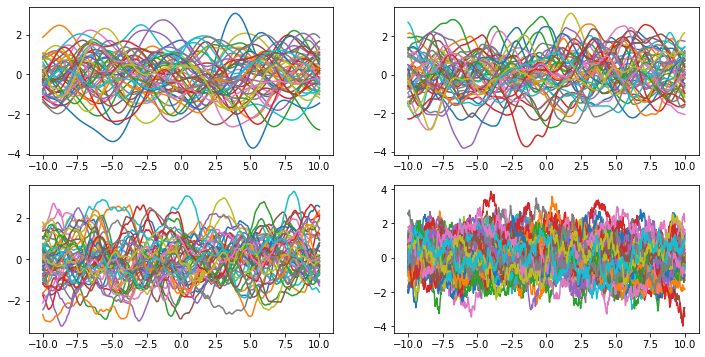

In [9]:
plt.figure(figsize=(12,6))
plt.subplot(221)
plt.plot(test_pts, samples_sqexp.T);

plt.subplot(222)
plt.plot(test_pts, samples_matern52.T);

plt.subplot(223)
plt.plot(test_pts, samples_matern32.T);

plt.subplot(224)
plt.plot(test_pts, samples_matern12.T);

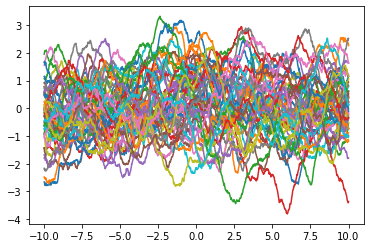

In [10]:
plt.plot(test_pts, samples_mix.T);

In [11]:
ps_sqexp = xrft.power_spectrum(samples_sqexp, dim=['x'], window=True)
ps_matern12 = xrft.power_spectrum(samples_matern12, dim=['x'], window=True)
ps_matern32 = xrft.power_spectrum(samples_matern32, dim=['x'], window=True)
ps_matern52 = xrft.power_spectrum(samples_matern52, dim=['x'], window=True)

In [12]:
ps_mix = xrft.power_spectrum(samples_mix, dim=['x'], window=True)

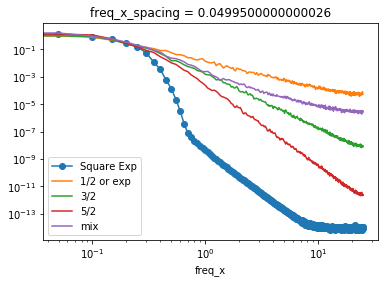

In [13]:
ps_sqexp.mean('func_sample_num').plot(marker='o', label='Square Exp')
ps_matern12.mean('func_sample_num').plot(label='1/2 or exp')
ps_matern32.mean('func_sample_num').plot(label='3/2')
ps_matern52.mean('func_sample_num').plot(label='5/2')
ps_mix.mean('func_sample_num').plot(label='mix')
plt.xscale('log')
plt.yscale('log')
plt.legend()
# the weird spectral slope , starting at very small values is a result of windowing and edge effects. 

(1e-06, 10.0)

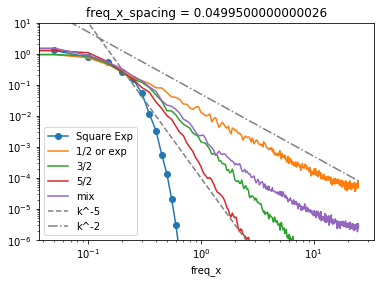

In [21]:
ps_sqexp.mean('func_sample_num').plot(marker='o', label='Square Exp')
ps_matern12.mean('func_sample_num').plot(label='1/2 or exp')
ps_matern32.mean('func_sample_num').plot(label='3/2')
ps_matern52.mean('func_sample_num').plot(label='5/2')
ps_mix.mean('func_sample_num').plot(label='mix')
plt.xscale('log')
plt.yscale('log')

plt.plot(ps_mix.freq_x, 1e-4*ps_mix.freq_x**-5, linestyle='--', color='gray', label='k^-5')
plt.plot(ps_mix.freq_x, 5e-2*ps_mix.freq_x**-2, linestyle='-.', color='gray', label='k^-2')

plt.legend()
plt.ylim([1e-6, 1e1])
# notice how the mix kernel has the properties of a steeper spectrum first, 
# and then transitions to something shallower later. 